In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import core.config as config
from core.model_loader import load_pretrained_VAE
from core.data_loader import TRAIN_loader, TEST_loader
from core.custom_loss import KL_div, VAE_loss
from core.fisher_utils import Calculate_fisher, Calculate_score
from core.visualize import plot_hist, AUROC

# CIFAR10

In [11]:
train_dist = 'cifar10'
opt = config.VAE_cifar10
netE, netG = load_pretrained_VAE(option=train_dist)

dicts = [ netE.conv1.weight]

# Calculate the Fisher & Score (for CIFAR10)

In [12]:
Grads, normalize_factor = Calculate_fisher(netE,
                                           netG,
                                           TRAIN_loader(option='cifar10'),
                                           dicts,
                                           opt=opt,
                                          )

cifar_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='cifar10', target_dist='cifar10'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  with_label=opt.with_label,
                                 )

svhn_Gradients = Calculate_score(netE,
                                 netG,
                                 TEST_loader(train_dist='cifar10', target_dist='svhn'),
                                 dicts,
                                 Grads,
                                 normalize_factor,
                                 max_iter=5000,
                                 opt=opt,
                                 with_label=opt.with_label,
                                )

# celeba_Gradients = Calculate_score(netE,
#                                    netG,
#                                    TEST_loader(train_dist='cifar10', target_dist='celeba'),
#                                    dicts,
#                                    Grads,
#                                    normalize_factor,
#                                    max_iter=5000,
#                                    opt=opt,
#                                    num_samples=opt.num_samples,
#                                    with_label=opt.with_label,
#                                   )

Files already downloaded and verified


Calculate Fisher:  20%|███████████▏                                            | 10001/50000 [10:48<43:12, 15.43step/s]


Files already downloaded and verified


Calculate Score:  50%|█████████████████████████████                             | 5001/10000 [05:59<05:58, 13.93step/s]


Using downloaded and verified file: ../data\test_32x32.mat


Calculate Score:  19%|███████████▏                                              | 5001/26032 [05:55<24:55, 14.07step/s]


In [13]:
lsun_Gradients = Calculate_score(netE,
                                 netG,
                                 TEST_loader(train_dist='cifar10', target_dist='lsun', shuffle=True),
                                 dicts,
                                 Grads,
                                 normalize_factor,
                                 max_iter=5000,
                                 opt=opt,
                                 with_label=opt.with_label,
                                )

Calculate Score: 100%|█████████████████████████████████████████████████████████████| 600/600 [00:43<00:00, 13.80step/s]


In [14]:
noise_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='cifar10', target_dist='noise'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  with_label=opt.with_label,
                                 )

Calculate Score:  50%|█████████████████████████████                             | 5001/10000 [05:52<05:52, 14.17step/s]


# Visualize

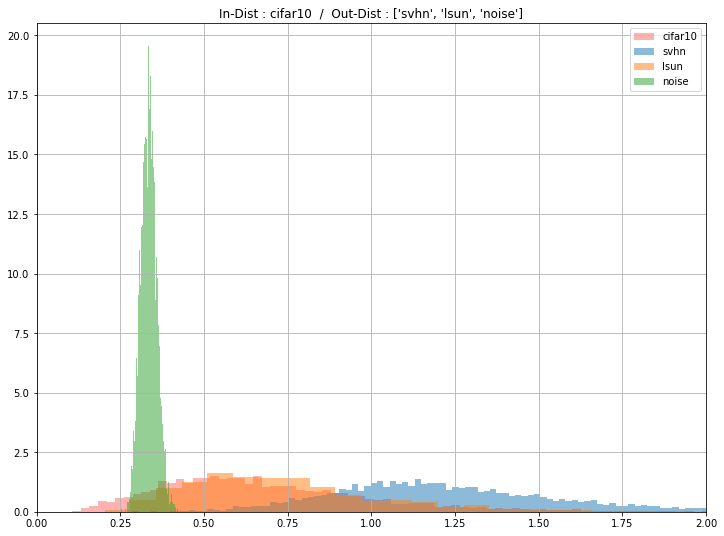

In [15]:
args = [cifar_Gradients, svhn_Gradients,  lsun_Gradients, noise_Gradients]#celeba_Gradients,
bins = [1000, 1000, 100, 100]
labels = ['cifar10', 'svhn', 'lsun', 'noise'] #celeba
xlim = [0, 2]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)

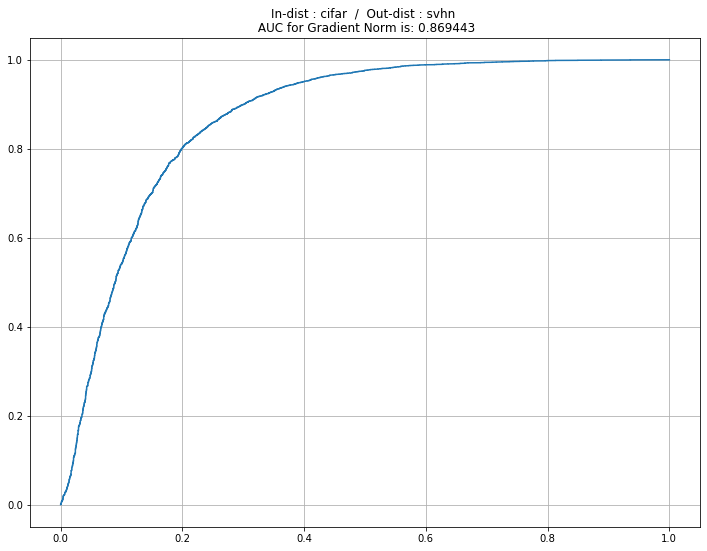

In [16]:
args = [cifar_Gradients, svhn_Gradients]
labels = ['cifar', 'svhn']
AUROC(*args, labels=labels)

In [17]:
# args = [cifar_Gradients, celeba_Gradients]
# labels = ['cifar', 'celeba']
# AUROC(*args, labels=labels)

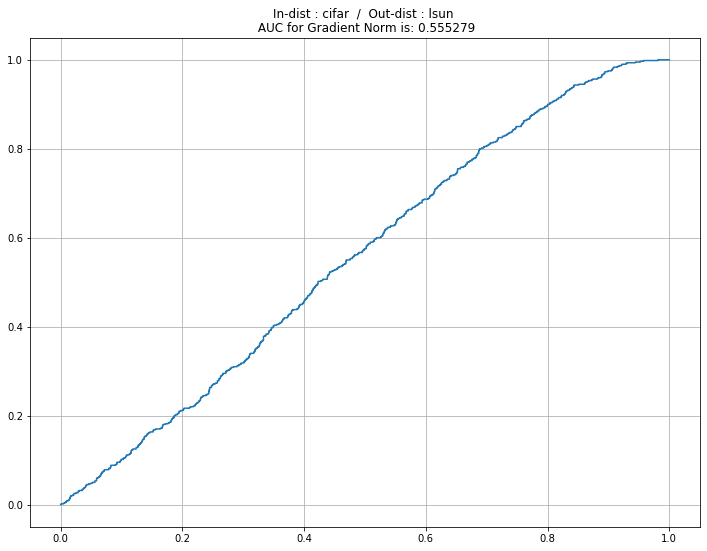

In [18]:
args = [cifar_Gradients, lsun_Gradients]
labels = ['cifar', 'lsun']
AUROC(*args, labels=labels)

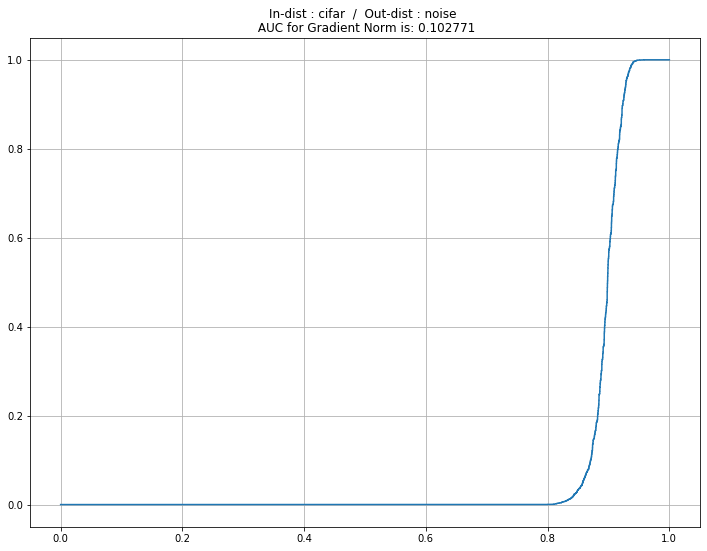

In [19]:
args = [cifar_Gradients, noise_Gradients]
labels = ['cifar', 'noise']
AUROC(*args, labels=labels)

# FMNIST

In [3]:
train_dist = 'fmnist'
opt = config.VAE_fmnist
netE, netG = load_pretrained_VAE(option=train_dist)

dicts = [netG.main[-1].weight, netE.conv1.weight]

# Calculate the Fisher & Score (for FMNIST)

In [4]:
Grads, normalize_factor = Calculate_fisher(netE,
                                           netG,
                                           TRAIN_loader(option='fmnist'),
                                           dicts,
                                           max_iter=10000,
                                           opt=opt,
                                           num_samples=opt.num_samples,
                                          )

fmnist_Gradients = Calculate_score(netE,
                                   netG,
                                   TEST_loader(train_dist='fmnist', target_dist='fmnist'),
                                   dicts,
                                   Grads,
                                   normalize_factor,
                                   max_iter=5000,
                                   opt=opt,
                                   num_samples=opt.num_samples,
                                   with_label=opt.with_label,
                                  )

mnist_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='fmnist', target_dist='mnist'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  num_samples=opt.num_samples,
                                  with_label=opt.with_label,
                                 )

noise_Gradients = Calculate_score(netE,
                                  netG,
                                  TEST_loader(train_dist='fmnist', target_dist='noise'),
                                  dicts,
                                  Grads,
                                  normalize_factor,
                                  max_iter=5000,
                                  opt=opt,
                                  num_samples=opt.num_samples,
                                  with_label=opt.with_label,
                                 )

Calculate Score:  50%|█████████████████████████████                             | 5001/10000 [00:56<00:56, 88.08step/s]


# Visualize

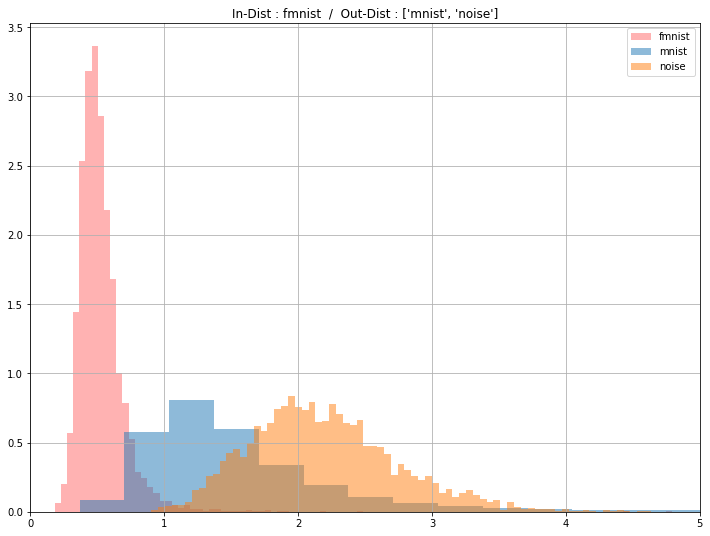

In [5]:
args = [fmnist_Gradients, mnist_Gradients, noise_Gradients]
bins = [100, 100, 100]
labels = ['fmnist', 'mnist', 'noise']
xlim = [0, 5]
plot_hist(*args, bins=bins, labels=labels, xlim=xlim)

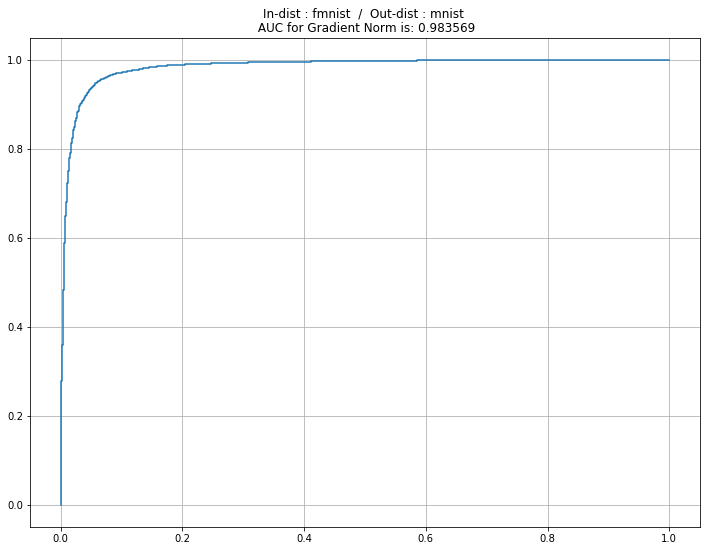

In [6]:
args = [fmnist_Gradients, mnist_Gradients]
labels = ['fmnist', 'mnist']
AUROC(*args, labels=labels)

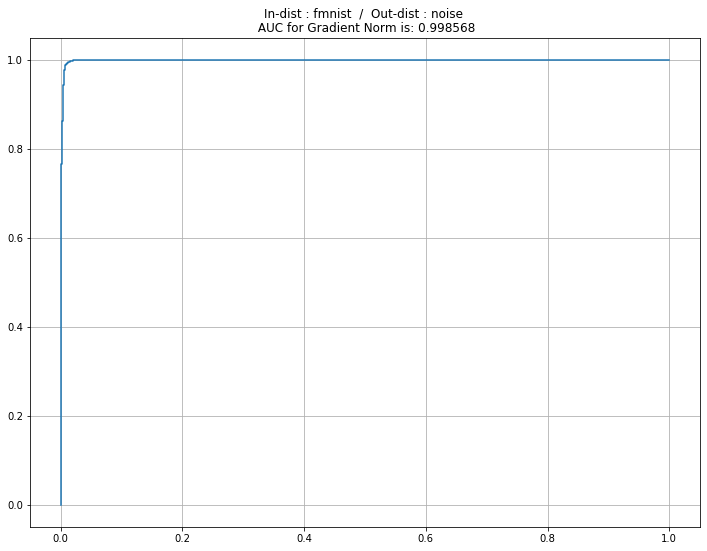

In [7]:
args = [fmnist_Gradients, noise_Gradients]
labels = ['fmnist', 'noise']
AUROC(*args, labels=labels)